###You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.



In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
data=pd.read_csv('house_price.csv')


In [3]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


### This dataset contains 13200 rows and 7 columns.

In [4]:
data.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
data.isnull().sum()

In [10]:
#finding outliers using mean function
mean=data['price_per_sqft'].mean()
print('mean:',mean)
median=data['price_per_sqft'].median()
print('median:',median)

mean: 7920.336742424242
median: 5438.0


### Mean is greater than median which shows the data in the price_per_sqft column is positively skewed.





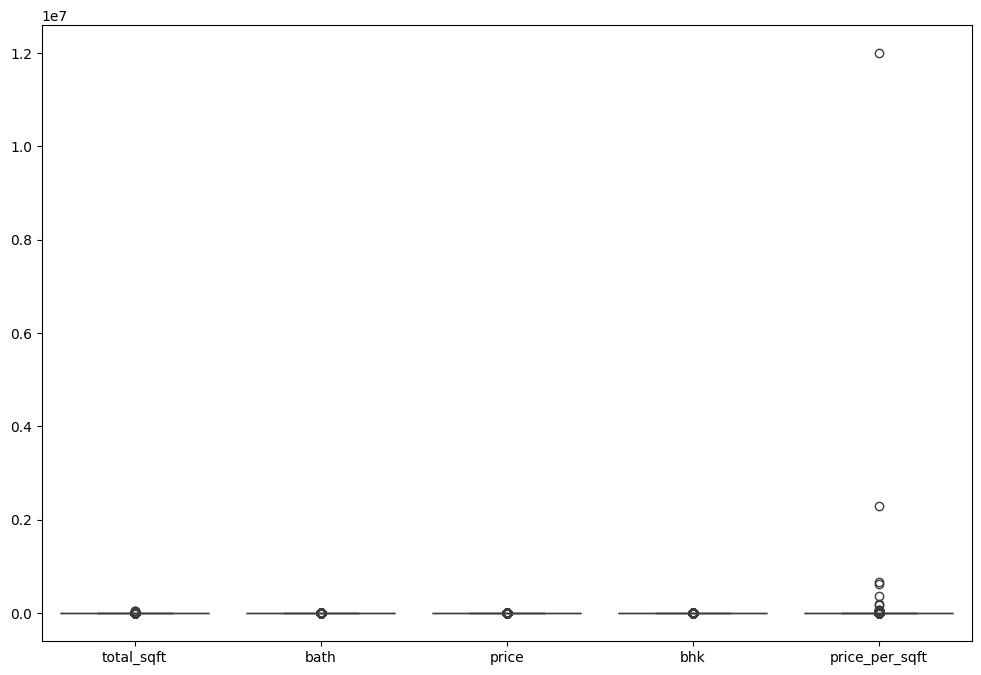

In [6]:
#boxplot- price per sqft
# Box plot for all numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.show()

### This box plot shows the presence of  ouliers in price per sqft column.

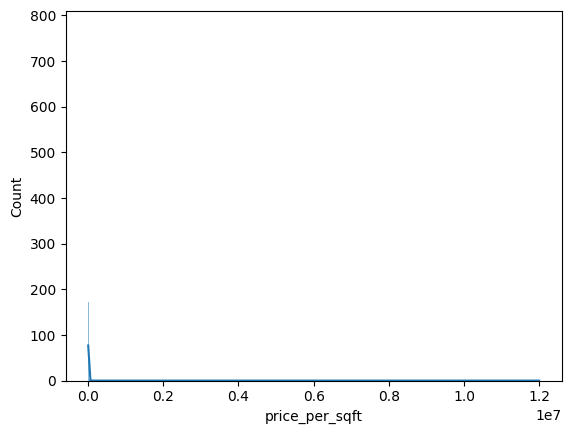

In [6]:
#histplot of price_per_sqft
sns.histplot(data=data,x='price_per_sqft',kde=True)
plt.show()

### The histplot is not normally distributed. The plot shows that the data is skewed towards its right which indicates the presence of outliers in the higher price region.

In [7]:
#finding outliers using percentile method and removing it.
data['price_per_sqft'].quantile([0.05,0.1,0.20,0.5,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.996,0.997,0.998])



0.050     3107.850
0.100     3500.000
0.200     4019.000
0.500     5438.000
0.750     7317.000
0.760     7440.000
0.770     7539.000
0.780     7718.440
0.790     7873.210
0.800     8019.200
0.810     8223.380
0.820     8428.000
0.830     8695.000
0.840     9000.000
0.850     9333.900
0.860     9809.280
0.870    10086.390
0.880    10620.600
0.890    11017.880
0.900    11666.000
0.910    12142.990
0.920    12857.000
0.930    13559.350
0.940    14394.800
0.950    15312.100
0.960    16500.000
0.970    17857.000
0.980    20000.000
0.990    23674.450
0.992    25282.104
0.994    27083.000
0.996    29166.000
0.997    31417.648
0.998    35326.746
Name: price_per_sqft, dtype: float64

In [54]:
lower_percentile=data['price_per_sqft'].quantile(0.0025)
upper_percentile=data['price_per_sqft'].quantile(0.83)

In [55]:
data1=data[(data['price_per_sqft'] >= lower_percentile) & (data['price_per_sqft'] <= upper_percentile)]
data1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: ylabel='price_per_sqft'>

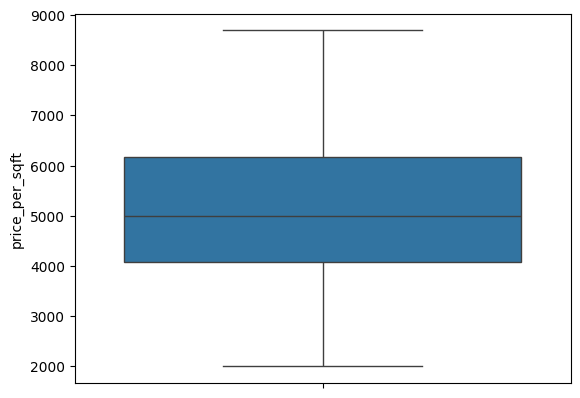

In [57]:
#boxplot- price per sqft
sns.boxplot(y=data1['price_per_sqft'])

### outliers are removed efficiently

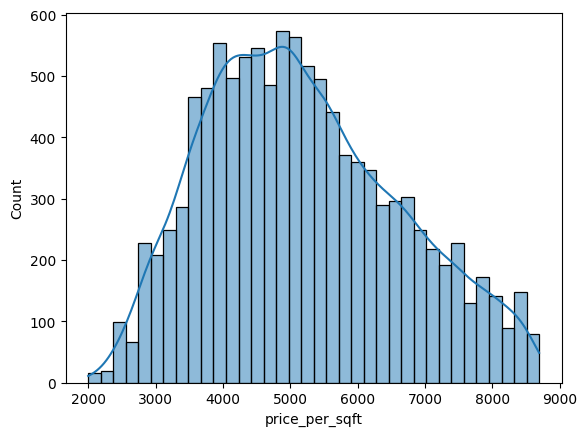

In [56]:
#histplot
sns.histplot(data=data1,x='price_per_sqft',kde=True)
plt.show()

### The histogram is normally distributed

In [58]:
#using IQR
Q1=data['price_per_sqft'].quantile(.25)
print('Q1',Q1)
Q3=data['price_per_sqft'].quantile(.75)
print('Q3',Q3)
IQR=Q3-Q1
print('IQR',IQR)

Q1 4267.0
Q3 7317.0
IQR 3050.0


In [59]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
lower_whisker,upper_whisker


(-308.0, 11892.0)

In [ ]:
data2=data[(data['price_per_sqft']>=lower_whisker) & (data['price_per_sqft']<=upper_whisker)]
data2


<Axes: ylabel='price_per_sqft'>

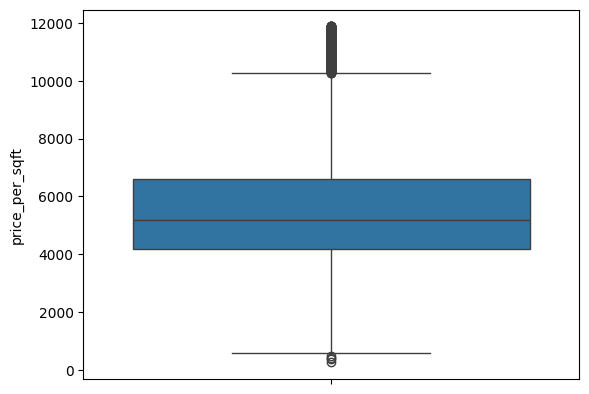

In [73]:
#box plot
sns.boxplot(y=data2['price_per_sqft'])


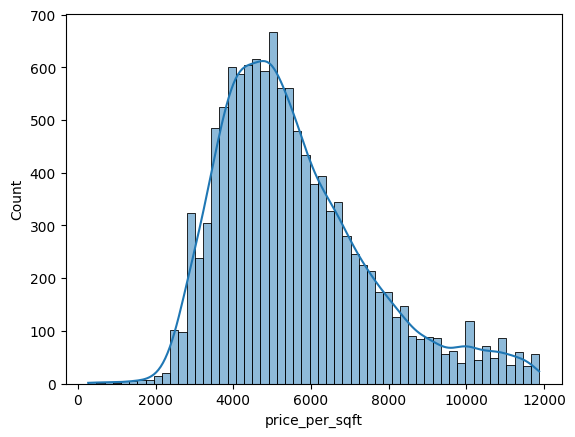

In [74]:
#histplot
sns.histplot(data=data2,x='price_per_sqft',kde=True)
plt.show()


In [11]:
#using mean and std score
std_dev=data['price_per_sqft'].std()
upper=mean+3*std_dev
lower=mean-3*std_dev


In [77]:
outliers_std=data[(data['price_per_sqft']>upper) | (data['price_per_sqft']<lower)]
outliers_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [12]:
data3=data[(data['price_per_sqft']<upper) & (data['price_per_sqft']>lower)] #data without ouliers
data3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

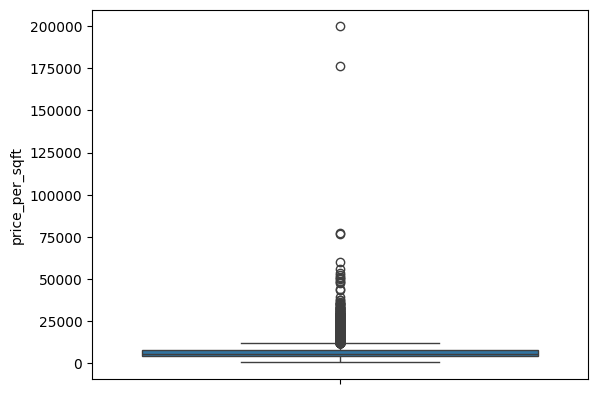

In [79]:
sns.boxplot(y=data3['price_per_sqft'])

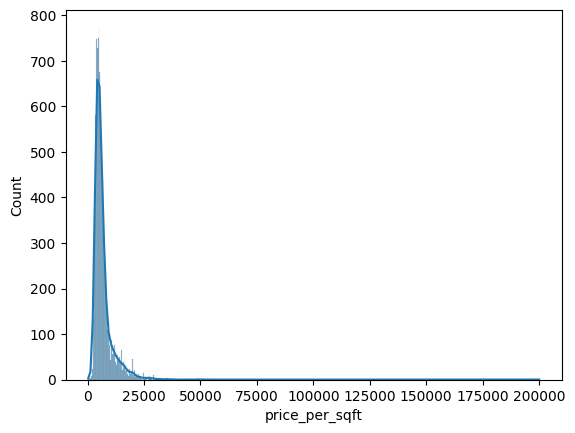

In [84]:
#hist plot
sns.histplot(data=data3,x='price_per_sqft',kde=True)
plt.show()

In [80]:
#using z_score to identify and remove outliers.
from scipy import stats
z_scores = stats.zscore(data['price_per_sqft'])

abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)

# Filter the data to remove outliers
data4 = data[filtered_entries]
data4




,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### There are 5 outliers while using z score.

<Axes: ylabel='price_per_sqft'>

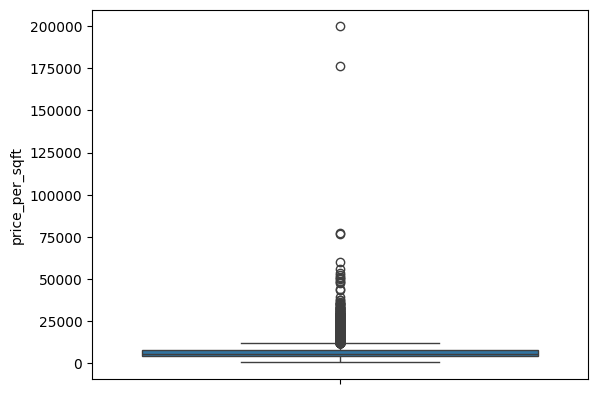

In [83]:
#box plot
sns.boxplot(y=data4['price_per_sqft'])

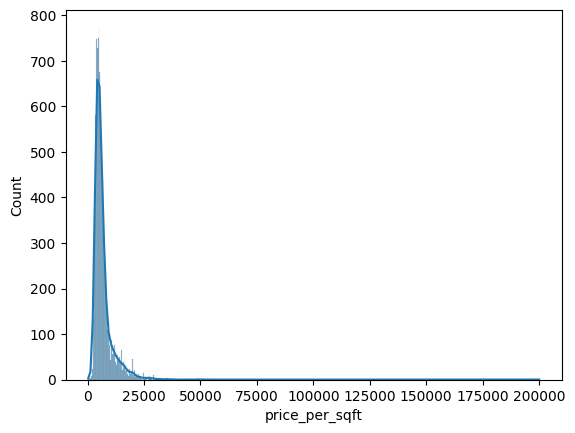

In [85]:
#hist plot
sns.histplot(data=data4,x='price_per_sqft',kde=True)
plt.show()

### Percentile and IQR method best suits in finding and removing outliers in this dataset

In [18]:
#perfoming one-hotencoding to location
encoded_data=pd.get_dummies(data=data,columns=['location'])

In [25]:
corr_matrix=encoded_data.corr()
corr_matrix

,total_sqft,bath,price,bhk,price_per_sqft,num_bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267,0.346013,0.003585,0.007601,-0.008917,-0.004998,...,0.012944,-0.013061,-0.008634,0.041050,-0.009362,0.021436,-0.016919,-0.007279,-0.008241,0.052349
bath,0.392743,1.000000,0.455998,0.897951,0.030883,0.897951,0.017947,0.016487,-0.012947,0.048364,...,0.046930,0.018224,-0.017595,0.003629,-0.018654,-0.016795,-0.034636,-0.012600,-0.015384,0.105331
price,0.574330,0.455998,1.000000,0.396883,0.028387,0.396883,0.020800,0.017999,-0.012796,0.031059,...,0.003342,-0.009223,-0.015811,0.020880,-0.005863,-0.022294,-0.009892,-0.012940,-0.007334,0.119788
bhk,0.346013,0.897951,0.396883,1.000000,0.030955,1.000000,0.039226,0.012077,-0.007736,0.057470,...,0.044070,0.022147,-0.023073,-0.019601,-0.003038,-0.021157,-0.030953,-0.013845,-0.016169,0.120582
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000,0.030955,0.001092,0.000893,-0.001048,0.003771,...,0.000380,-0.000122,-0.001407,-0.002015,-0.000278,-0.003009,-0.001118,-0.001150,-0.000709,0.007379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Yelahanka,0.021436,-0.016795,-0.022294,-0.021157,-0.003009,-0.021157,-0.004143,-0.005426,-0.003672,-0.005426,...,-0.003992,-0.003835,-0.007269,-0.026081,-0.004953,1.000000,-0.007010,-0.003992,-0.010236,-0.067049
location_Yelahanka New Town,-0.016919,-0.034636,-0.009892,-0.030953,-0.001118,-0.030953,-0.001796,-0.002353,-0.001592,-0.002353,...,-0.001731,-0.001663,-0.003152,-0.011309,-0.002148,-0.007010,1.000000,-0.001731,-0.004438,-0.029073
location_Yelenahalli,-0.007279,-0.012600,-0.012940,-0.013845,-0.001150,-0.013845,-0.001023,-0.001340,-0.000907,-0.001340,...,-0.000986,-0.000947,-0.001795,-0.006441,-0.001223,-0.003992,-0.001731,1.000000,-0.002528,-0.016557
location_Yeshwanthpur,-0.008241,-0.015384,-0.007334,-0.016169,-0.000709,-0.016169,-0.002623,-0.003436,-0.002325,-0.003436,...,-0.002528,-0.002428,-0.004602,-0.016514,-0.003136,-0.010236,-0.004438,-0.002528,1.000000,-0.042453


In [ ]:
#Generate scatter plots between numerical variables
sns.pairplot(data)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr_matrix,annot = True)
plt.show()